# ML PROJECT
---

## Names and Quids:
- Mohammed Salah - 201912733
- Osama Osman - 201909415
- Salman Taher - 201909507
- Ammar Elkhatib - 202005196
# Objective:

## Understanding the dynamics of hotel bookings is crucial for the hospitality industry to optimize revenue management strategies, enhance customer experiences, and adapt to evolving market trends. Factors such as seasonality, location, and customer demographics significantly influence booking patterns. Analyzing hotel booking data can unveil valuable insights into customer preferences, predict demand fluctuations, and inform pricing decisions.


## The data and the source:
[Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)


### Importing the libraries 

In [258]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, Normalizer, QuantileTransformer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import nbformat


### 1- Exploratory Data Analysis (EDA)

**Importing the data**

In [259]:
df = pd.read_csv("./hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**

### Bookings by Month and Hotel Type: This chart displays the number of bookings for each type of hotel across different months. It helps to observe seasonal trends and how they differ between resort and city hotels.

C:\Users\Salman Taher\AppData\Local\Temp\ipykernel_24536\1655958100.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


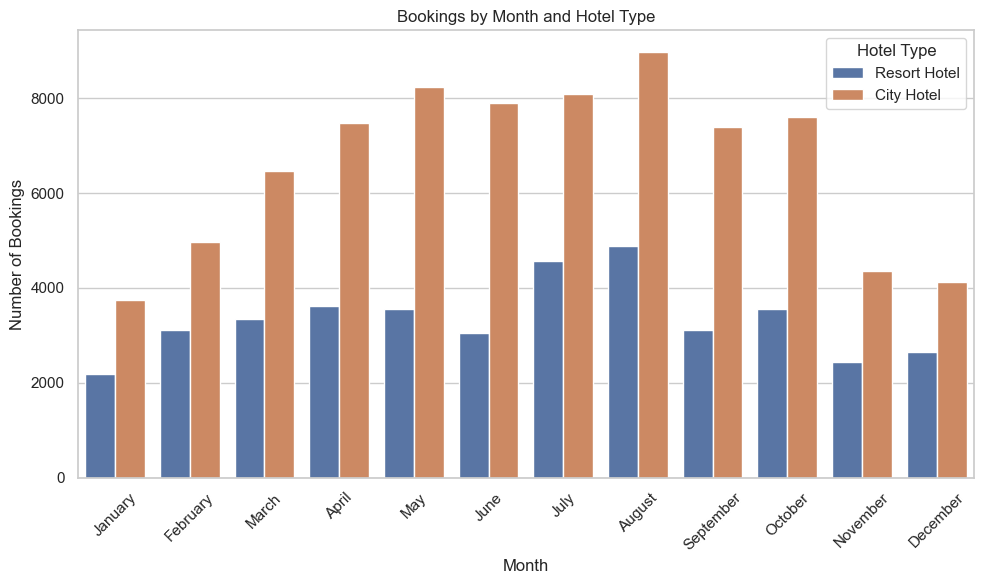

In [260]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='arrival_date_month', hue='hotel', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'])
ax.set_title('Bookings by Month and Hotel Type')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bookings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


The chart reveals that both resort and city hotels experience peaks in bookings during the summer months (July and August) and a significant decline during the winter months (November and December). However, city hotels consistently receive more bookings throughout the year compared to resort hotels.

### Distribution of Lead Time: This histogram shows the distribution of the number of days in advance bookings are made. The lead times vary widely, with a significant number of bookings made both very early and very close to the arrival date.

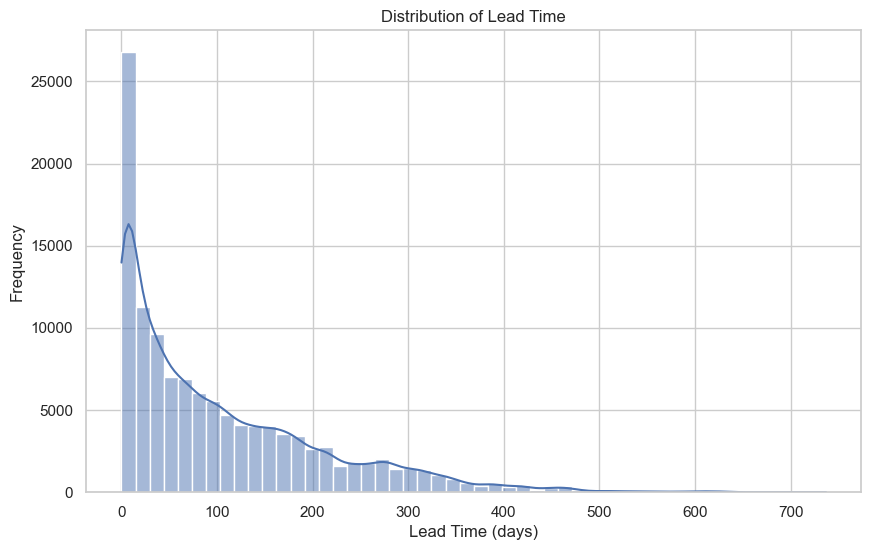

In [261]:
# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Create the histogram for the distribution of lead time
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['lead_time'], kde=True, bins=50)  # KDE (Kernel Density Estimate) adds a smoothed line
ax.set_title('Distribution of Lead Time')
ax.set_xlabel('Lead Time (days)')
ax.set_ylabel('Frequency')

plt.show()


The **histogram illustrates** a heavily right-skewed distribution of lead time. Most bookings are made with a short lead time (less than 50 days), while a smaller but substantial proportion of bookings are made far in advance (over 200 days). This suggests that while many customers book close to their stay, there's also a considerable number who plan their accommodations well ahead of time.

### Average Daily Rate (ADR) by Month and Hotel Type: The line plot illustrates how the ADR changes throughout the year for different types of hotels. This can indicate pricing strategies and seasonal demand variations.

C:\Users\Salman Taher\AppData\Local\Temp\ipykernel_24536\230779193.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order, rotation=45)  # Ensuring x-labels match the month order


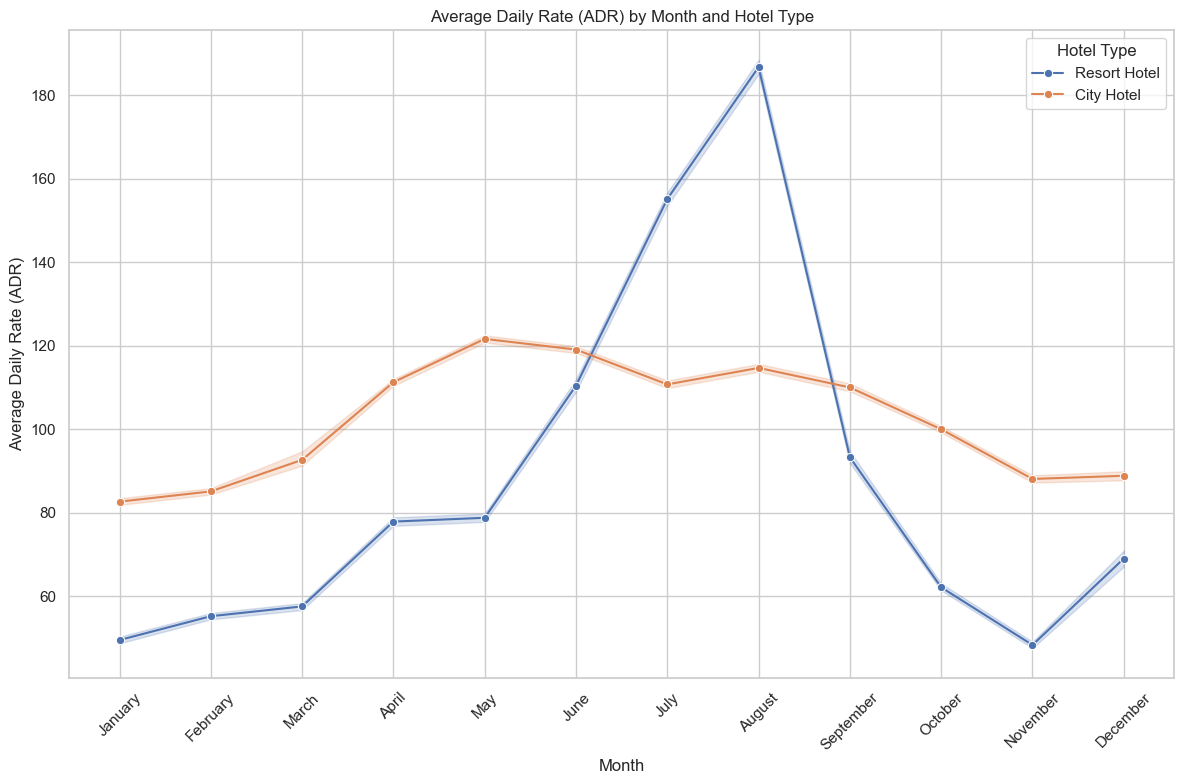

In [262]:
# Convert month names to a categorical type with a logical order for proper plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Create the line plot for ADR by month and hotel type
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df, marker='o')
ax.set_title('Average Daily Rate (ADR) by Month and Hotel Type')
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate (ADR)')
ax.set_xticklabels(month_order, rotation=45)  # Ensuring x-labels match the month order

plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


The graph shows **ADR** (Average Daily Rate) for both resort and city hotels peaks in the summer (June-August), with resort hotels consistently having a higher ADR. Conversely, both experience a significant decrease in ADR during the off-season (November-February), with city hotels maintaining a slightly higher ADR.

### Relationship Between Special Requests and Cancellations: The count plot provides insights into how the number of special requests might correlate with booking cancellations. It appears that bookings with fewer special requests have a higher rate of cancellations.

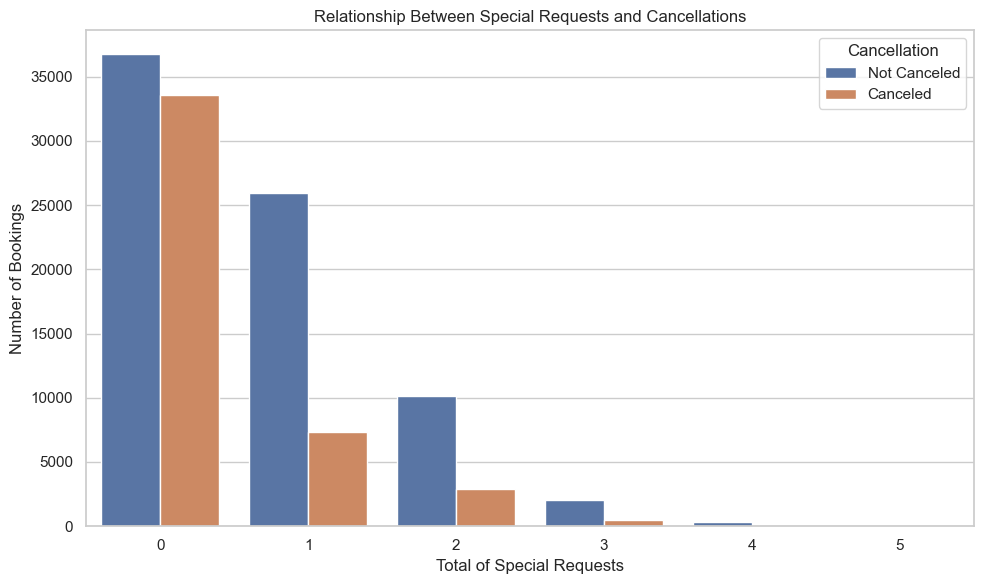

In [263]:
# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Create the bar plot for the relationship between special requests and cancellations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df)
ax.set_title('Relationship Between Special Requests and Cancellations')
ax.set_xlabel('Total of Special Requests')
ax.set_ylabel('Number of Bookings')
ax.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

The chart shows that bookings with no special requests have the highest cancellation and not canceled rates. As the number of special requests rises, both types of bookings decrease. This suggests a potential negative correlation between special requests and cancellations, but more analysis is needed.

In [264]:
# Check the shape of the dataset
df.shape

(119390, 32)

**Let's take a look at the data types we have:**

In [265]:
df.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
deposit_type                        object
agent      

In [266]:
# Display the information about the data, such as the number of rows and columns, data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  category
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

### All unique labels for each feature:

In [267]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'B

### More information about lables count for each feature.

In [268]:
# Frequency counts for categorical variables
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [269]:
df['arrival_date_month'].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [270]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [271]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [272]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [273]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [274]:
df['reserved_room_type'].value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [275]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [276]:
df['reservation_status_date'].value_counts()

reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: count, Length: 926, dtype: int64

In [277]:
# Display summary statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**C. Univariate Analysis**

- Numerical Data


#### This analysis investigates typical booking timelines to understand customer behavior. A histogram effectively illustrates the distribution of how many days in advance customers book their reservations. This helps identify trends in booking patterns, revealing whether guests tend to plan far ahead or make more last-minute decisions.

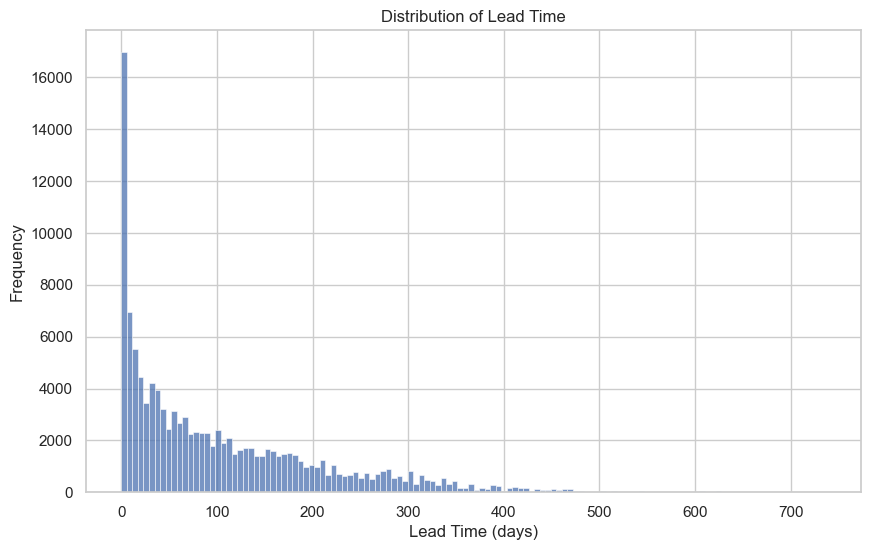

In [278]:
# Plot for Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=False)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

The histogram reveals a right-skewed distribution, indicating that most bookings are made with a shorter lead time (under 50 days). However, a smaller but substantial portion is made far in advance (over 200 days). This suggests the hotel serves both those who plan ahead and last-minute bookers.

#### This analysis examines the range and distribution of average daily room rates. A histogram is used to observe how room rates are spread out, indicating pricing strategies and identifying typical rates as well as outliers.

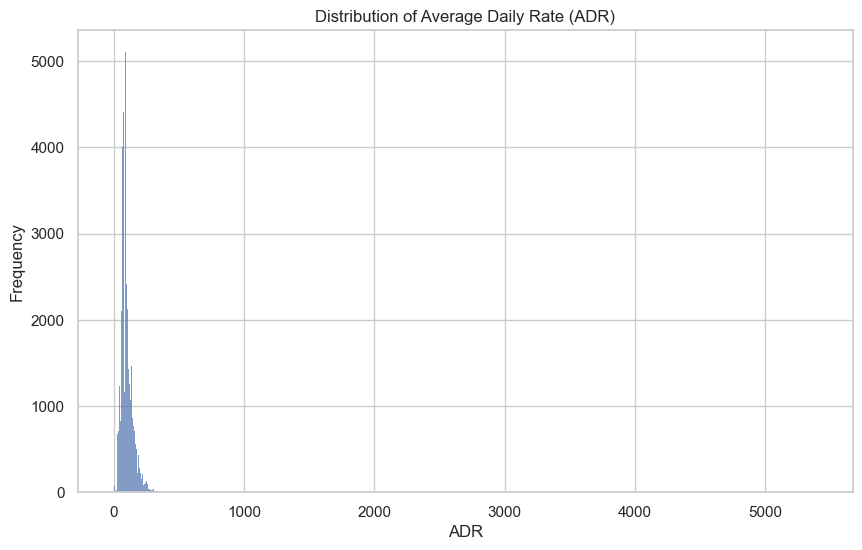

In [279]:
# Plot for Average Daily Rate (ADR)
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], kde=False)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()


The histogram of Average Daily Rates (ADR) is heavily right-skewed, peaking at lower rates (under $100) and tapering off towards higher values. This suggests the majority of rooms are booked at more affordable prices, with a smaller portion reserved at premium rates.

#### This analysis investigates the typical length of guests' weekend stays. A histogram shows the distribution of these stays, revealing guest preferences and helping to anticipate peak occupancy periods.

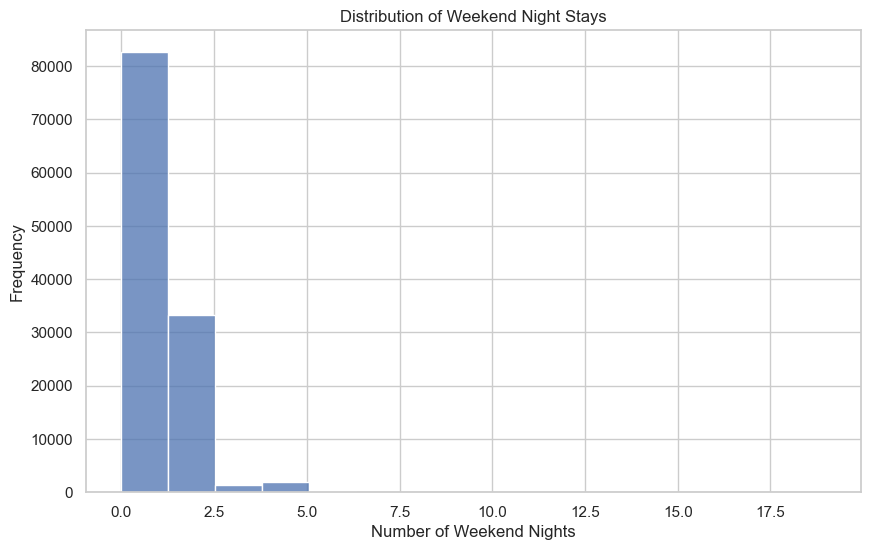

In [280]:
# Plot for Stays in Weekend Nights
plt.figure(figsize=(10, 6))
sns.histplot(df['stays_in_weekend_nights'], bins=15, kde=False)
plt.title('Distribution of Weekend Night Stays')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()


The histogram reveals most guests opt for no weekend nights, followed by two-night stays. Bookings sharply decline beyond two nights, with few exceeding five. This suggests a preference for shorter weekend stays among the hotel's clientele.

#### This analysis examines the typical length of guests' weekday stays. A histogram displays the distribution of these stays, helping to distinguish between leisure and business travel patterns.

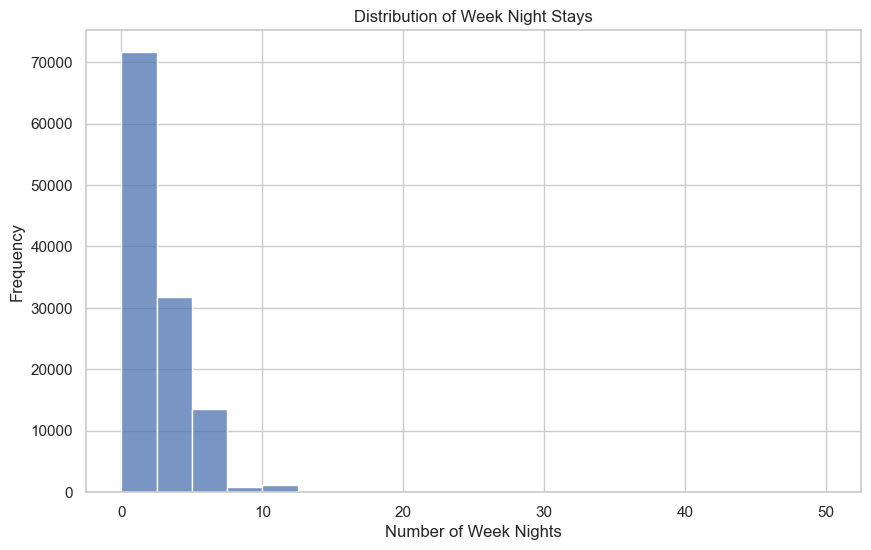

In [281]:
# Plot for Stays in Week Nights
plt.figure(figsize=(10, 6))
sns.histplot(df['stays_in_week_nights'], bins=20, kde=False)
plt.title('Distribution of Week Night Stays')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.show()


The histogram reveals a majority of short stays during weekdays, with most guests not staying any weeknights, followed by one or two nights. Longer stays are less frequent, suggesting a higher proportion of business travelers or those on brief city breaks.

#### This analysis examines the frequency of special requests associated with bookings. A histogram reveals the distribution of these requests, providing insights into common customer needs and expectations.

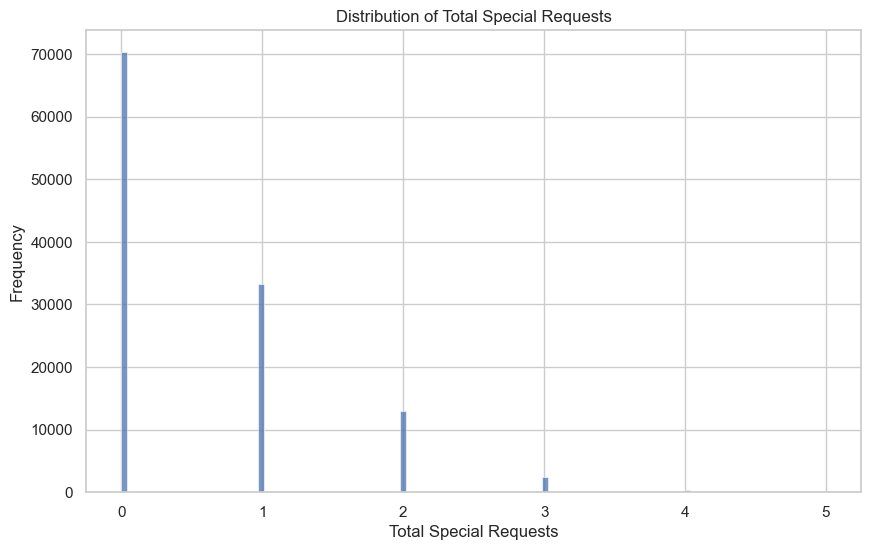

In [282]:
# Plot for Total Special Requests
plt.figure(figsize=(10, 6))
sns.histplot(df['total_of_special_requests'], kde=False)
plt.title('Distribution of Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Frequency')
plt.show()

The histogram shows most bookings have zero or one special request, with a sharp decrease as the number increases. This means most guests have few to no special requests.

#### This analysis examines booking frequencies across different hotel types. A count plot visualizes the volume of bookings for each hotel category, aiding in resource allocation and targeted marketing strategies.

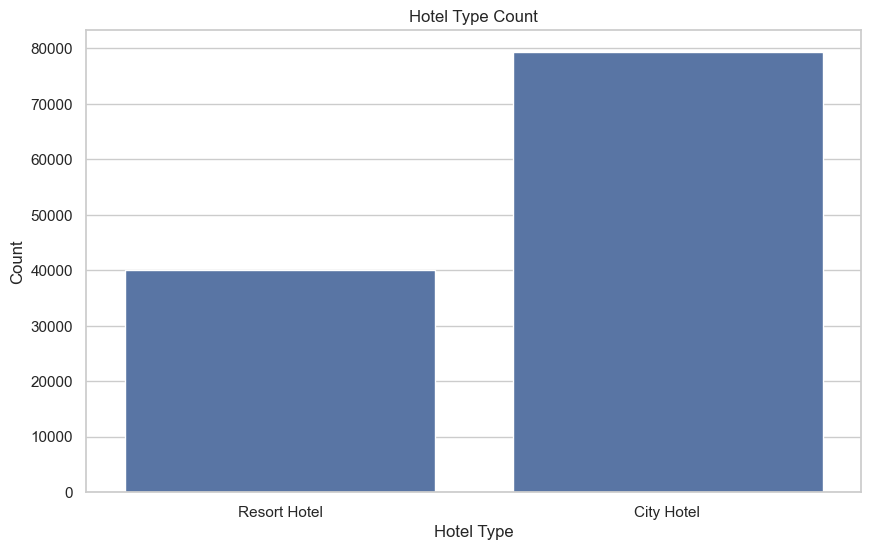

In [283]:
# Plot for Hotel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', data=df)
plt.title('Hotel Type Count')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

The count plot clearly shows that city hotels have a significantly higher booking frequency than resort hotels, indicating greater demand for city hotels. This could be valuable for resource allocation and marketing strategies.

#### This analysis focuses on cancellation rates within the dataset. A count plot visualizes the number of canceled bookings compared to those not canceled. This information is crucial for understanding how cancellations impact the business and potentially identifying patterns that could help predict them.

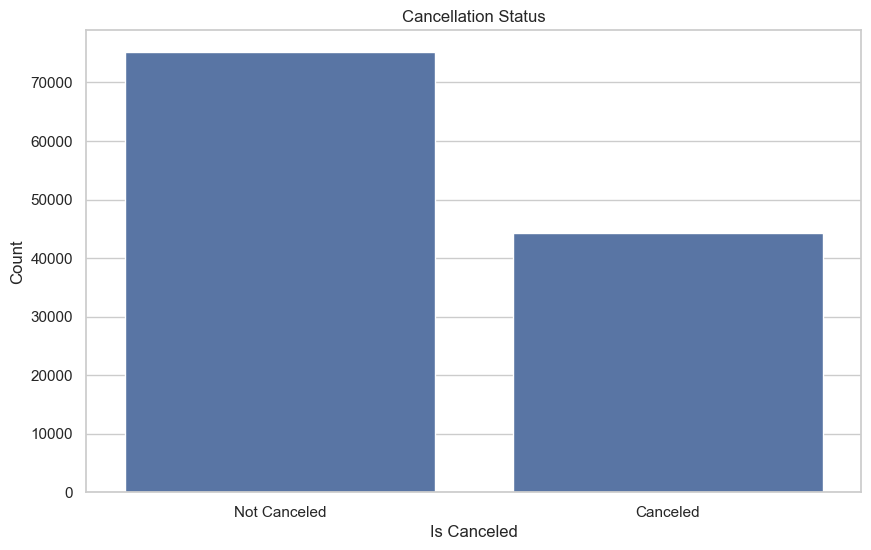

In [284]:
# Plot for Cancellation Status
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

The count plot clearly shows that not canceled bookings significantly outnumber canceled ones. This indicates cancellations, while present, are a smaller portion compared to successful reservations.

-----------------

<Axes: xlabel='lead_time', ylabel='adr'>

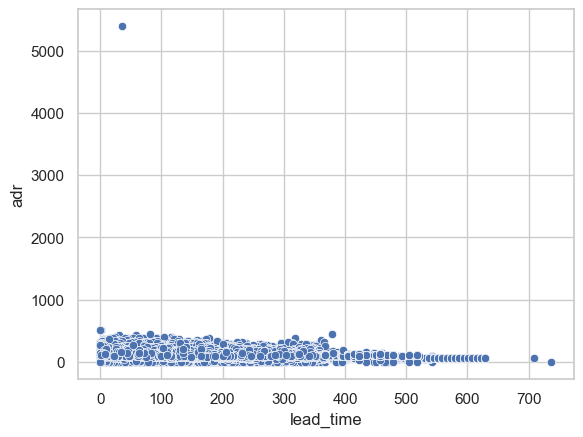

In [285]:
sns.scatterplot(x='lead_time', y='adr', data=df)


**Now since we noticed from the above visualizations that most of our data is right skewed, let's identify the outliers better using box plot and then deal with them.**


We'll do this for a set of features such as: **lead_time**,**stays_in_weekend_nights**, **stays_in_week_nights**, **adults, children, babies**, **adr** , and **previous_cancellations, previous_bookings_not_canceled**, also for **days_in_waiting_list**, the reason for why each one of those was chose to be studied will be explained above each plot.

First let's do so by investigating **lead_time**

**lead_time**: This feature measures the time from booking to arrival. Extreme values can indicate unusual booking behaviors, such as very early bookings or last-minute reservations, which might affect demand forecasting and pricing strategies.

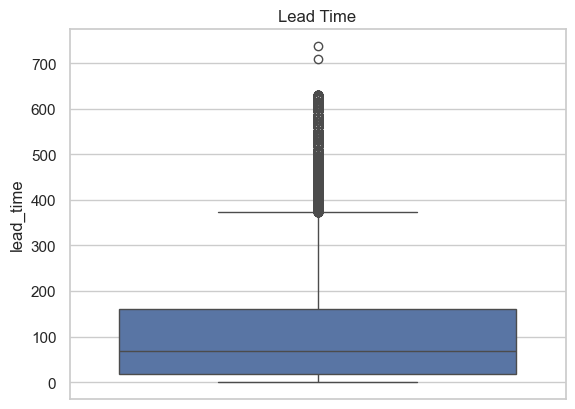

In [286]:
plt.figure()
sns.boxplot(y=df['lead_time'])
plt.title('Lead Time')
plt.show()


Now let's check both **stays_in_weekend_nights and stays_in_week_nights**:

**stays_in_weekend_nights and stays_in_week_nights**: These features measure the length of stay, which directly affects room availability and revenue. Extremely long or short stays can be anomalies that might skew average stay calculations and impact resource planning.

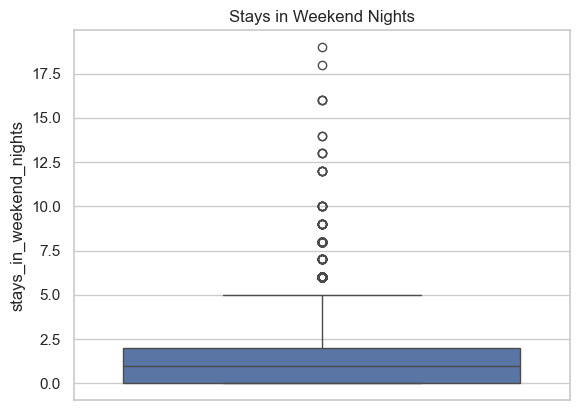

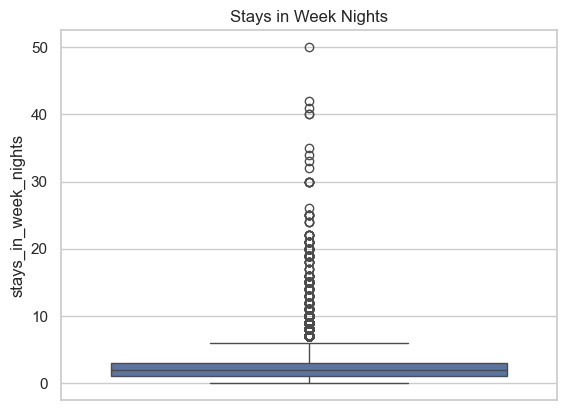

In [287]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['stays_in_weekend_nights'])
plt.title('Stays in Weekend Nights')
plt.show()


sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['stays_in_week_nights'])
plt.title('Stays in Week Nights')
plt.show()


The box plot for **adults, children, babies**:

**adults, children, babies:** The number of guests per booking can affect room allocations and service requirements. Abnormally high numbers might indicate group bookings or data entry errors.


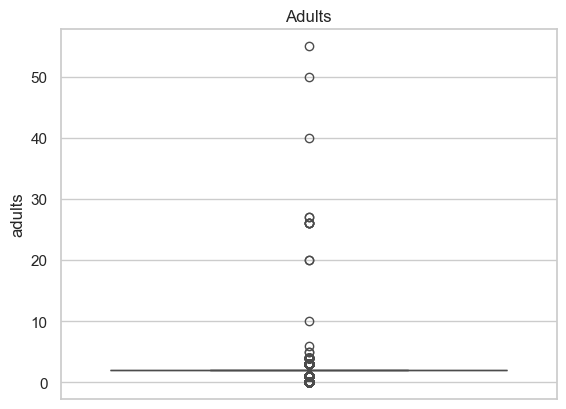

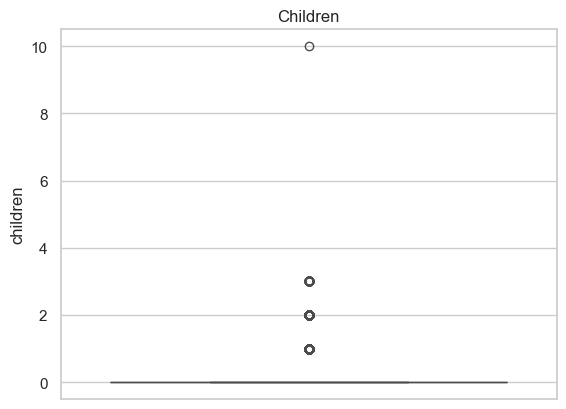

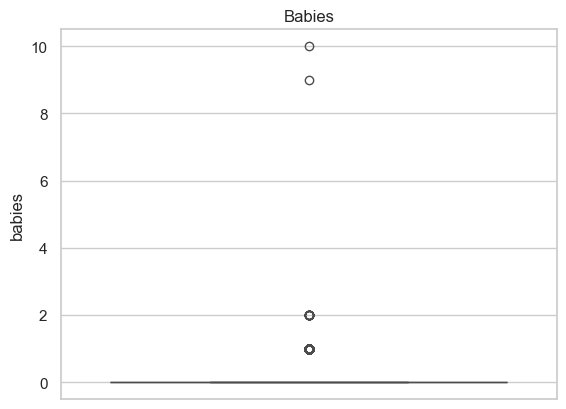

In [288]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['adults'])
plt.title('Adults')
plt.show()

sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['children'])
plt.title('Children')
plt.show()

sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['babies'])
plt.title('Babies')
plt.show()

The box plot for **adr**:

**adr (Average Daily Rate):** This is a critical financial metric. Outliers here could represent special packages, errors, or atypical bookings (like presidential suites or special events) that could distort average revenue analyses.


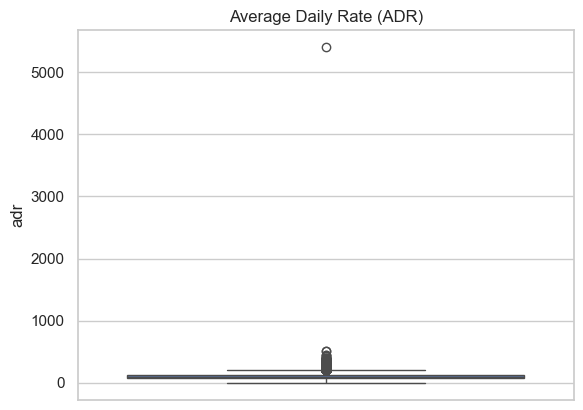

In [289]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['adr'])
plt.title('Average Daily Rate (ADR)')
plt.show()

The box plot for **previous_cancellations** and **previous_bookings_not_canceled**

**previous_cancellations, previous_bookings_not_canceled**: High values in these features might indicate customers with unusual booking patterns, which could be important for understanding customer behavior or assessing risk.


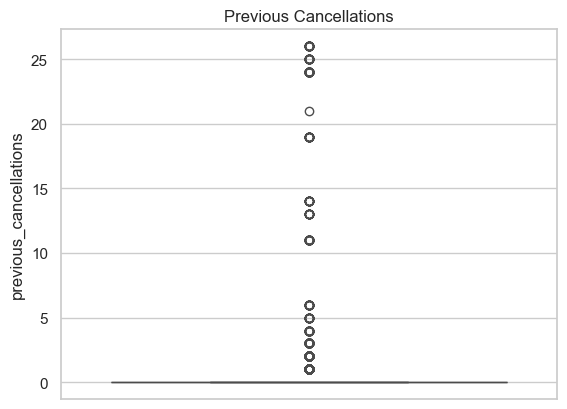

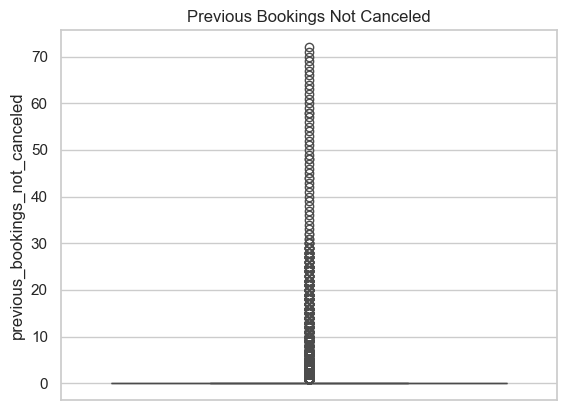

In [290]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['previous_cancellations'])
plt.title('Previous Cancellations')
plt.show()

sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['previous_bookings_not_canceled'])
plt.title('Previous Bookings Not Canceled')
plt.show()

Lastly, the box plot for **days_in_waiting_list**:

**days_in_waiting_list**: Long waiting times can indicate high demand periods or inefficiencies in the booking process. Analyzing outliers here can help in optimizing the booking flow and managing customer expectations.


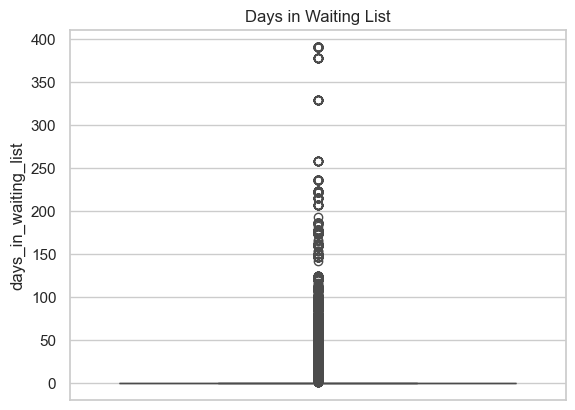

In [291]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(y=df['days_in_waiting_list'])
plt.title('Days in Waiting List')
plt.show()

## 2- Data Cleaning and Preprocessing

Let's now deal with the outliers from the above data, we did consider two choices either **cap (Winsorizing)** or **Deleting (Trimming)**, choosing one was difficult due the different type of outliers, since we wanted to use **Capping** for data which are not seem to be due to an error in data entry (like :**previous_bookings_not_canceled**) and **Deleting** for values which are really different than the rest and probably due to an error in data entry but in general will cause problems when training the models (like: **adr**) 

In [292]:
features_to_cap = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list']
features_to_delete = ['adults', 'children', 'babies']

# Capping
for feature in features_to_cap:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

# Deleting
for feature in features_to_delete:
    reasonable_max = df[feature].quantile(0.99)  # Removing the top 1% as potential errors
    df = df[df[feature] <= reasonable_max]


Let's now check if we have **Duplicates** in our dataset.

In [293]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# display the duplicated rows
df[duplicates]

Number of duplicate rows: 32111


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


As above the number of duplicate rows is 32111, it's huge.
dealing with this is tricky due to the huge amount of duplicate rows, we used the default '**duplicated()**' function because it checks all columns in the DataFrame. If every column in one row has the same value as every column in another row, those rows are considered duplicates.

A thing we took in mind is that for such a data set, it's possible for two separate guests or agents to book identical stays, especially for standard rooms or common booking scenarios. However, exact matches across all details, including transactional and customer-related information, could still indicate data entry errors or system issues.

this is why we'll proceed with **deleting** the duplicate rows.

In [294]:
# number of rows before removing duplicates
print("Number of rows before removing duplicates:", df.shape[0])
df = df.drop_duplicates()
# Check the shape of the dataset
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows before removing duplicates: 118315
Number of rows after removing duplicates: 86204


Let's now address **missing values** and check if we have any:

In [295]:
#get the number of missing data points per column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             447
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11924
company                           81029


In [296]:
#get a summary of the type of data in the dataset
df.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
deposit_type                        object
agent      

To address the missing values in our dataset, we need to apply 3 different techniques.

- **mode**: is to handle the **country** feature since it's a categorical value.

- **flag**: for **agent** since a significant amount of it is missing but we don't see deleting the column is a wise choice for now.

- **drop**: we'll drop the **company** column since more than 60% of the data is missing in this column, 100% of it is missing matter of fact.

In [297]:
# Fill 'country' column with the mode (most frequent value)
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

# Create a missing value indicator for 'agent'
df['missing_agent'] = df['agent'].isnull().astype(int)

# Replace missing values in 'agent' with a placeholder value (-1)
df['agent'].fillna(-1, inplace=True)

# Drop the 'company' column
df.drop('company', axis=1, inplace=True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [298]:
# show a summary of the dataset
df[['agent', 'missing_agent']].head()

,agent,missing_agent
0,-1.0,1
1,-1.0,1
2,-1.0,1
3,304.0,0
4,240.0,0


In [299]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,missing_agent
count,86204.000000,86204.000000,86204.000000,86204.000000,86204.000000,86204.000000,86204.000000,86204.000000,86204.000000,86204.0,86204.000000,86204.0,86204.0,86204.000000,86204.000000,86204.0,86204.000000,86204.000000,86204.000000,86204.000000
mean,0.275892,79.498562,2016.212264,26.810948,15.819324,0.998121,2.504988,1.869751,0.135284,0.0,0.038699,0.0,0.0,0.264779,80.567909,0.0,104.604541,0.083221,0.689852,0.138323
std,0.446965,84.356441,0.685486,13.679717,8.832737,0.994700,1.623940,0.509205,0.446639,0.0,0.192877,0.0,0.0,0.721608,109.935685,0.0,47.646680,0.280055,0.825211,0.345241
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,9.000000,0.0,72.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,9.000000,0.0,98.000000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,229.000000,0.0,133.770000,0.000000,1.000000,0.000000
max,1.000000,373.000000,2017.000000,53.000000,31.000000,5.000000,6.000000,3.000000,2.000000,0.0,1.000000,0.0,0.0,21.000000,535.000000,0.0,211.065000,8.000000,5.000000,1.000000


#### Visualizing the reservation status feature lebels frequencies.

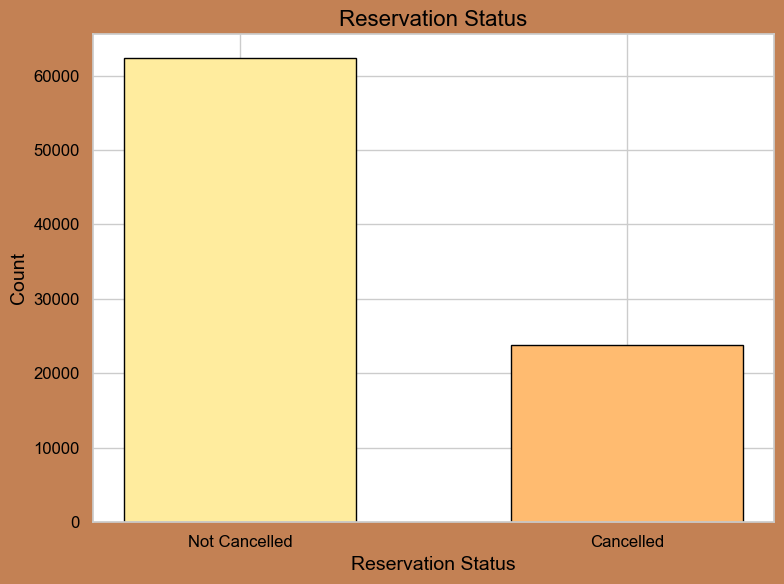

In [300]:
# Calculate cancellation percentages
cancelled_perc = df['is_canceled'].value_counts(normalize=True)

# Define color palette
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

# Plot
plt.figure(figsize=(8, 6), facecolor='#C38154') 
plt.title('Reservation Status', fontsize=16, color='Black')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='black', width=0.6, color=colors)
plt.xlabel('Reservation Status', fontsize=14, color='Black')
plt.ylabel('Count', fontsize=14, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.tight_layout()
plt.savefig('reservation_status_plot.png', bbox_inches='tight', transparent=True)
plt.show()

#### Visualizing the reservation status feature lebels frequencies for each hotel.

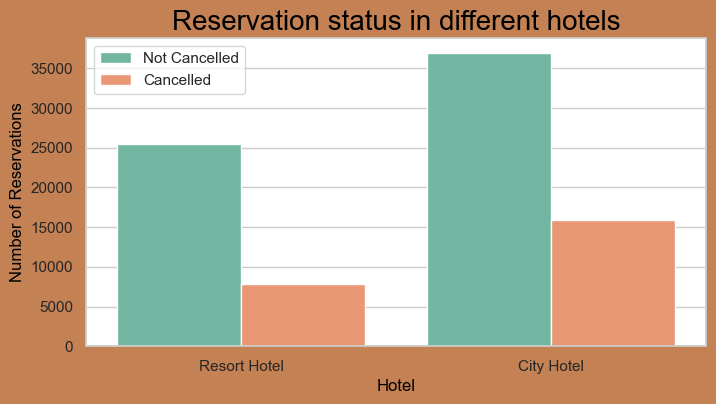

In [301]:
# Set the background color of the figure
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

- From the plots above we conclude that the number of Reservations canceld in City hotel have the highr percentage.

### Now let us see the current data frame so far.

In [302]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,missing_agent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


## To find the correlations between the data frame features we have to first convert the categorical types into numerical types.

In [303]:
#hotel_bookings = pd.read_csv(df)

# Display the first few rows of the dataset and the data types of each column
df.head(), df.dtypes


(          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
 0  Resort Hotel            0        342               2015               July   
 1  Resort Hotel            0        373               2015               July   
 2  Resort Hotel            0          7               2015               July   
 3  Resort Hotel            0         13               2015               July   
 4  Resort Hotel            0         14               2015               July   
 
    arrival_date_week_number  arrival_date_day_of_month  \
 0                        27                          1   
 1                        27                          1   
 2                        27                          1   
 3                        27                          1   
 4                        27                          1   
 
    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
 0                        0                     0       2  ...    No D

In [304]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,missing_agent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


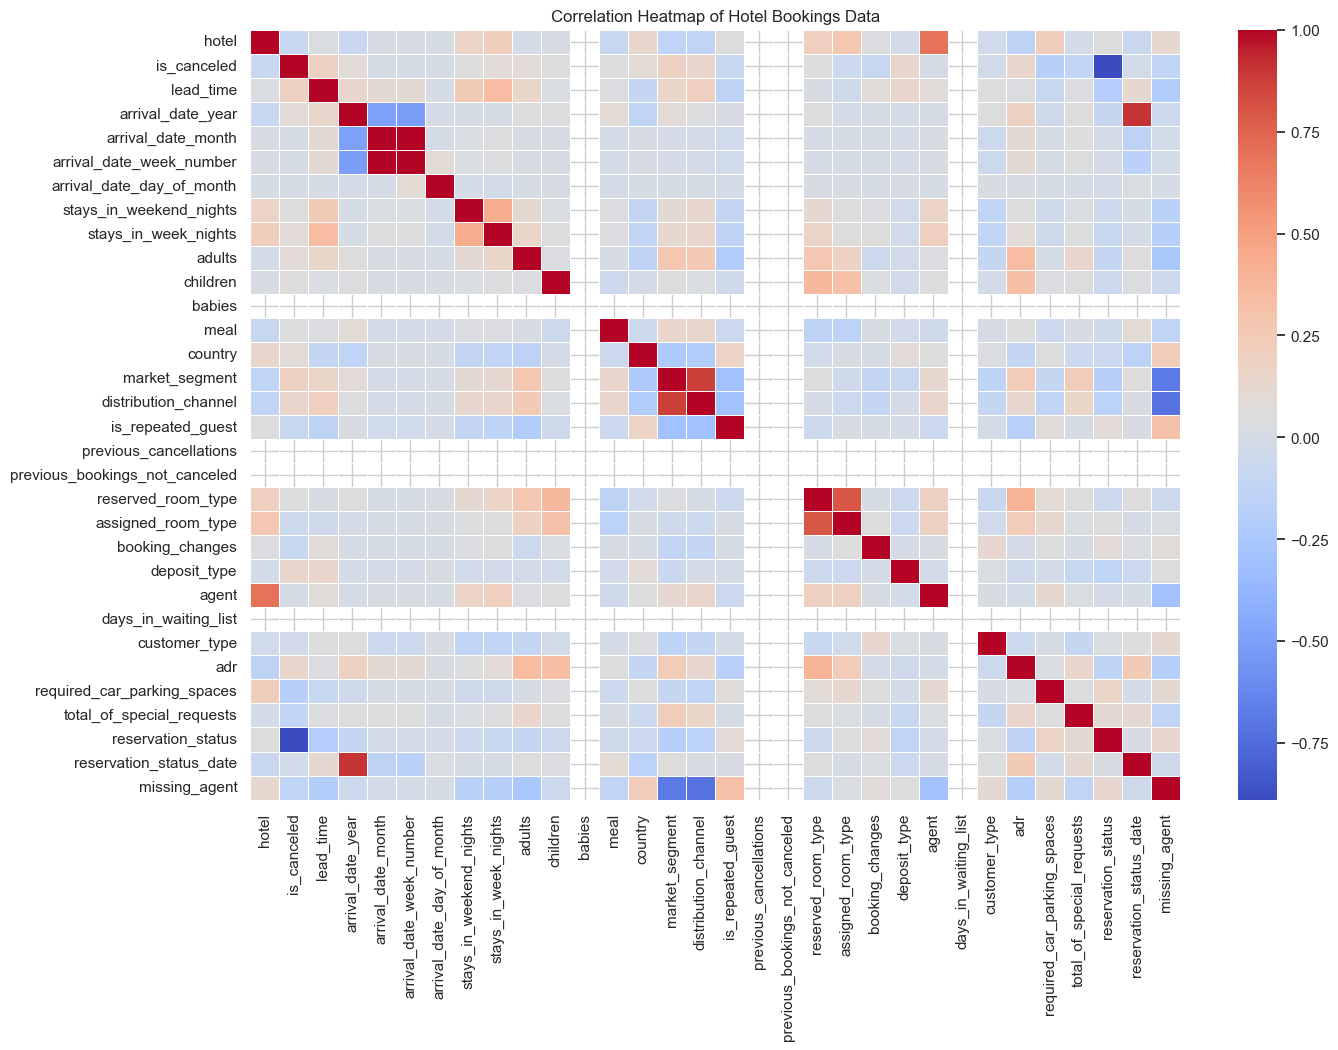

In [305]:

# Function to encode categorical columns
def encode_categorical(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le
    return df, label_encoders

df, label_encoders = encode_categorical(df)  # Corrected this line

# Convert categorical columns to numerical columns
for column in df.select_dtypes(include=['category']):
    df[column] = df[column].cat.codes

# Fill missing values with median for each column
df.fillna(df.median(), inplace=True)

# Generate a correlation matrix
correlation_matrix = df.corr()  # Added this line

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Hotel Bookings Data')
plt.show()


In [306]:
# Extract the correlation values with the 'is_canceled' column and sort them to identify the most impactful features.
correlation_with_cancellation = correlation_matrix['is_canceled'].sort_values(key=abs, ascending=False)

# Display the sorted correlations with 'is_canceled' to identify the most impactful features
correlation_with_cancellation


is_canceled                       1.000000
reservation_status               -0.888601
lead_time                         0.184905
required_car_parking_spaces      -0.183426
market_segment                    0.182028
distribution_channel              0.150123
adr                               0.141156
deposit_type                      0.137206
missing_agent                    -0.133494
total_of_special_requests        -0.118784
country                           0.093592
booking_changes                  -0.091832
arrival_date_year                 0.090329
stays_in_week_nights              0.090041
is_repeated_guest                -0.089534
adults                            0.088724
hotel                            -0.072288
children                          0.069821
assigned_room_type               -0.061298
stays_in_weekend_nights           0.059326
reserved_room_type                0.049710
meal                              0.046071
reservation_status_date          -0.030836
customer_ty

### From above we conclude that the most impactful features on the booking status are the following:\n",

- is_canceled                       1.000000
- reservation_status               -0.888601
- lead_time                         0.184905
- required_car_parking_spaces      -0.183426
- market_segment                    0.182028
- distribution_channel              0.150123
- adr                               0.141156
- deposit_type                      0.137206
- missing_agent                    -0.133494
- total_of_special_requests        -0.118784
- country                           0.093592
- booking_changes                  -0.091832
- arrival_date_year                 0.090329
- stays_in_week_nights              0.090041
- is_repeated_guest                -0.089534
- adults                            0.088724
- hotel                            -0.072288
- children                          0.069821
- assigned_room_type               -0.061298
- stays_in_weekend_nights           0.059326
- reserved_room_type                0.049710
- meal                              0.046071
- reservation_status_date          -0.030836
- customer_type                    -0.029952

### Now it is time to drop the features that are not impactful to reduce the resoucrse consumed to train the models and to reduce time.